In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
config = pd.read_csv("./config.csv")

In [3]:
twitterapikey= config['twitterapikey'][0]
twitterapisecret= config['twitterapisecret'][0]
twitterapiaccesstoken=config['twitterapiaccesstoken'][0]
twitterapiaccesstokensecret=config['twitterapiaccesstokensecret'][0]

In [4]:
auth=tweepy.OAuthHandler(twitterapikey,twitterapisecret)
auth.set_access_token(twitterapiaccesstoken,twitterapiaccesstokensecret)
twitterapi = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
twitteraccount = "sundarpichai"

In [6]:
tweets = tweepy.Cursor(twitterapi.user_timeline,
                      screen_name=twitteraccount,
                      count=None,
                      since_id=None,
                      max_id=None,trim_user=True,exclude_replies=True,contribubtor_details=False,
                      include_entities=False).items(50)

In [7]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

In [8]:
df.head()

,Tweet
0,We’re introducing updates in @GoogleWorkspace ...
1,It’s important that we not let the violence ag...
2,RT @verge: How one of Google’s massive underse...
3,.@Googleorg Fellows worked with researchers ar...
4,"Password Checkup is coming to @Android, alerti..."


In [9]:
import re
def cleanuptweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT : ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [10]:
df['Tweet']=df['Tweet'].apply(cleanuptweet)

In [11]:
def gettextsubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [12]:
def gettextpolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
df['subjectivity']=df['Tweet'].apply(gettextsubjectivity)
df['polarity']=df['Tweet'].apply(gettextpolarity)

In [14]:
df.head(50)

,Tweet,subjectivity,polarity
0,We’re introducing updates in designed to help...,0.500000,0.500000
1,It’s important that we not let the violence ag...,0.500000,0.200000
2,How one of Google’s massive undersea cables de...,1.000000,0.000000
3,. Fellows worked with researchers around the w...,0.000000,0.000000
4,"Password Checkup is coming to , alerting you i...",0.000000,0.000000
5,Today we shared 50+ new features across our le...,0.454545,0.136364
6,We’re proud to partner with 6 Black women-led ...,0.466667,0.116667
7,Hope the Year of the Ox brings peace and good ...,0.600000,0.875000
8,"Congrats , best wishes for Day 1 and Earth fu...",0.377273,0.585227
9,"Hot take: Samsung has the most improved, most ...",0.603810,0.387143


In [15]:
df = df.drop(df[df['Tweet']==''].index)

In [16]:
df.head(50)

,Tweet,subjectivity,polarity
0,We’re introducing updates in designed to help...,0.500000,0.500000
1,It’s important that we not let the violence ag...,0.500000,0.200000
2,How one of Google’s massive undersea cables de...,1.000000,0.000000
3,. Fellows worked with researchers around the w...,0.000000,0.000000
4,"Password Checkup is coming to , alerting you i...",0.000000,0.000000
5,Today we shared 50+ new features across our le...,0.454545,0.136364
6,We’re proud to partner with 6 Black women-led ...,0.466667,0.116667
7,Hope the Year of the Ox brings peace and good ...,0.600000,0.875000
8,"Congrats , best wishes for Day 1 and Earth fu...",0.377273,0.585227
9,"Hot take: Samsung has the most improved, most ...",0.603810,0.387143


In [17]:
def gettextanalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [18]:
df["score"]=df['polarity'].apply(gettextanalysis)

In [19]:
df.head(50)

,Tweet,subjectivity,polarity,score
0,Thank you to the scientific community for the ...,0.850000,0.600000,Positive
1,Congratulations to for agreeing to ambitious ...,0.741667,0.341667,Positive
2,California is facing one of its biggest challe...,0.000000,0.000000,Neutral
3,"Super proud of the team for these innovations,...",0.833333,0.666667,Positive
4,What did the world watch on YouTube in 2020? C...,0.700000,0.500000,Positive
5,Thrilled to announce our first major breakthro...,0.633333,0.353125,Positive
6,.'s incredible AI-powered protein folding brea...,0.700000,0.700000,Positive
7,"We’ve redesigned the app, starting in the US,...",0.350000,0.200000,Positive
8,Today we’re proud to honor veterans with a Goo...,1.000000,0.800000,Positive
9,Google Pixel5 Night Sight. Chamisa by moonlight.,0.000000,0.000000,Neutral


In [20]:
positive=df[df['score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of Positive tweets")
pos=positive.shape[0]/df.shape[0]*100

74.0% of Positive tweets


In [21]:
negative=df[df['score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of Negative tweets")
neg=negative.shape[0]/df.shape[0]*100

2.0% of Negative tweets


In [22]:
neutral=df[df['score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of Neutral tweets")
neutrall=neutral.shape[0]/df.shape[0]*100

24.0% of Neutral tweets


In [23]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutrall]
colors=['green','red','gold']

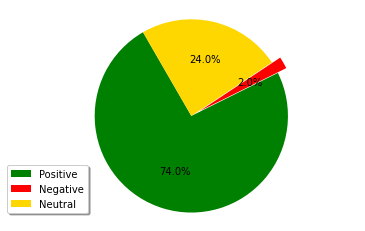

In [24]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis.png")

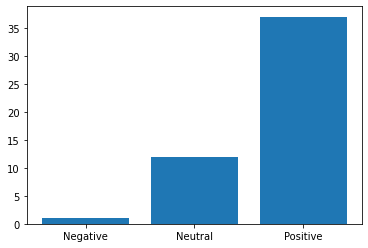

In [25]:
labels = df.groupby('score').count().index.values
values = df.groupby('score').size().values
plt.bar(labels,values)
plt.savefig("Sentiment_Analysis_bg.png")


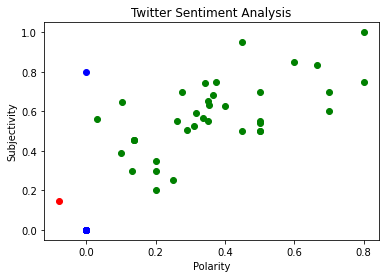

<Figure size 432x288 with 0 Axes>

In [26]:
for index, row in df.iterrows():
    if row['score']=='Positive':
        plt.scatter(row['polarity'],row['subjectivity'],color='green')
    elif row['score']=='Negative':
        plt.scatter(row['polarity'],row['subjectivity'],color='red')
    elif row['score']=='Neutral':
        plt.scatter(row['polarity'],row['subjectivity'],color='blue')

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
plt.savefig("Sentiment_Analysis_graph.jpg")

In [27]:
import os
import ipyparallel as ipp

rc = ipp.Client()
ar = rc[:].apply_async(os.getpid)
pid_map = ar.get_dict()


Waiting for connection file: ~\.ipython\profile_default\security\ipcontroller-client.json


OSError: Connection file '~\\.ipython\\profile_default\\security\\ipcontroller-client.json' not found.
You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.